In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams

In [ ]:
#importing dataset
dataset = pd.read_csv('/content/final_dataset.csv')
dataset['day'] = pd.to_datetime(dataset['day'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['day'])

In [ ]:
from datetime import datetime
print(indexedDataset.tail(10))

             value
day               
2022-02-25   98.56
2022-02-28  103.08
2022-03-01  110.93
2022-03-02  118.94
2022-03-03  115.36
2022-03-04  123.86
2022-03-07  129.02
2022-03-08  133.18
2022-03-09  116.58
2022-03-10  114.54


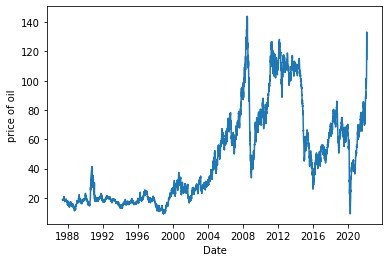

In [ ]:
#plot the graph
plt.xlabel("Date")
plt.ylabel("price of oil")
plt.plot(indexedDataset)

In [ ]:
print(indexedDataset.head(5).rolling(window=2).std())

               value
day                 
1987-05-20       NaN
1987-05-21  0.127279
1987-05-22  0.070711
1987-05-25  0.035355
1987-05-26  0.021213


In [ ]:
#making data stationary using rolling statistics
rolmean = indexedDataset.rolling(window=255).mean()
rolstd = indexedDataset.rolling(window=255).std()
print(rolmean,rolstd)

                value
day                  
1987-05-20        NaN
1987-05-21        NaN
1987-05-22        NaN
1987-05-25        NaN
1987-05-26        NaN
...               ...
2022-03-04  76.946039
2022-03-07  77.188000
2022-03-08  77.435961
2022-03-09  77.626471
2022-03-10  77.812784

[8838 rows x 1 columns]                 value
day                  
1987-05-20        NaN
1987-05-21        NaN
1987-05-22        NaN
1987-05-25        NaN
1987-05-26        NaN
...               ...
2022-03-04  10.503390
2022-03-07  10.980601
2022-03-08  11.517315
2022-03-09  11.759850
2022-03-10  11.965858

[8838 rows x 1 columns]


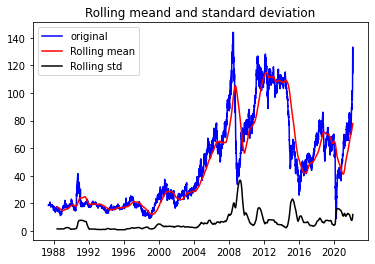

In [ ]:
#plotting roll statistics
orig = plt.plot(indexedDataset,color="blue",label="original")
mean = plt.plot(rolmean,color="red",label="Rolling mean")
std = plt.plot(rolstd,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling meand and standard deviation")
plt.show(block=False)

In [ ]:
#perform Dickey fuller test
from statsmodels.tsa.stattools import adfuller
print("Results are:")
dftest = adfuller(indexedDataset['value'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=["test Statistic",'p-value','#lags used','No of Observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key] = value
print(dfoutput)
#pvalue must be less

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results are:
test Statistic               -1.740332
p-value                       0.410461
#lags used                   34.000000
No of Observations used    8803.000000
Critical value (1%)          -3.431093
Critical value (5%)          -2.861868
Critical value (10%)         -2.566945
dtype: float64


<class 'pandas.core.frame.DataFrame'>


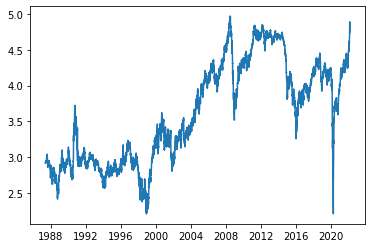

In [ ]:
#estimate the trend
indexedDataset_logScale = np.log(indexedDataset)
print(type(indexedDataset_logScale))
plt.plot(indexedDataset_logScale)


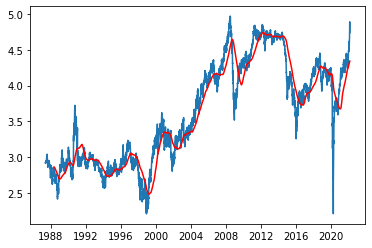

In [ ]:
#moving average
movingAverage = indexedDataset_logScale.rolling(window=255).mean()
movingSTD = indexedDataset_logScale.rolling(window=255).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color="red")

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

#remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,value
day,
1988-05-19,-0.073625
1988-05-20,-0.060905
1988-05-23,-0.073866
1988-05-24,-0.069055
1988-05-25,-0.075898
1988-05-26,-0.075345
1988-05-27,-0.070498
1988-05-30,-0.071195
1988-05-31,-0.072508


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #determining the roll statistics
  movingAverage = timeseries.rolling(window=255).mean()
  movingSTD = timeseries.rolling(window=255).std()

  #plotting roll statistics
  orig = plt.plot(timeseries,color="blue",label="original")
  mean = plt.plot(movingAverage,color="red",label="Rolling mean")
  std = plt.plot(movingSTD,color="black",label="Rolling std")
  plt.legend(loc="best")
  plt.title("Rolling meand and standard deviation")
  plt.show(block=False)

  #perform Dickey fuller test
  print("Results are:")
  dftest = adfuller(timeseries['value'],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=["test Statistic",'p-value','#lags used','No of Observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
  print(dfoutput)


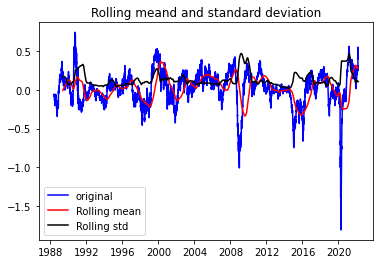

Results are:
test Statistic            -6.423910e+00
p-value                    1.763773e-08
#lags used                 2.900000e+01
No of Observations used    8.554000e+03
Critical value (1%)       -3.431115e+00
Critical value (5%)       -2.861878e+00
Critical value (10%)      -2.566950e+00
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

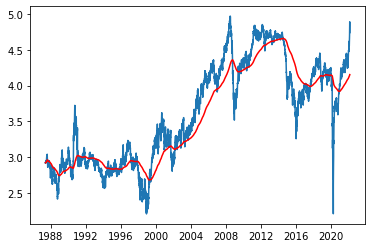

In [ ]:
#to check for trend in timeseries
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=255, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color="red")

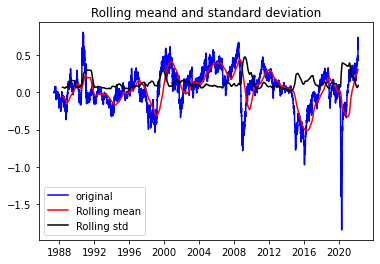

Results are:
test Statistic               -5.017729
p-value                       0.000020
#lags used                   29.000000
No of Observations used    8808.000000
Critical value (1%)          -3.431093
Critical value (5%)          -2.861868
Critical value (10%)         -2.566945
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

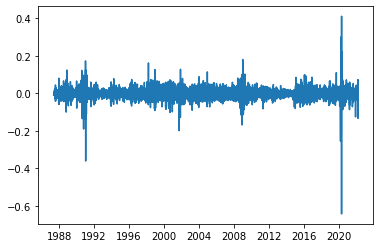

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting) 

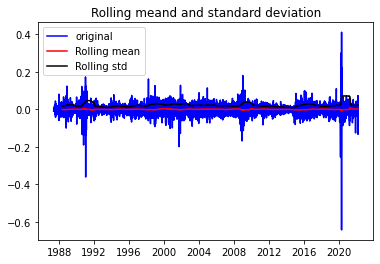

Results are:
test Statistic            -1.607452e+01
p-value                    5.461426e-29
#lags used                 3.000000e+01
No of Observations used    8.806000e+03
Critical value (1%)       -3.431093e+00
Critical value (5%)       -2.861868e+00
Critical value (10%)      -2.566945e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [ ]:
print(type(indexedDataset_logScale))
# indexedDataset_logScale = indexedDataset_logScale.squeeze()
# print(type(indexedDataset_logScale))

<class 'pandas.core.frame.DataFrame'>


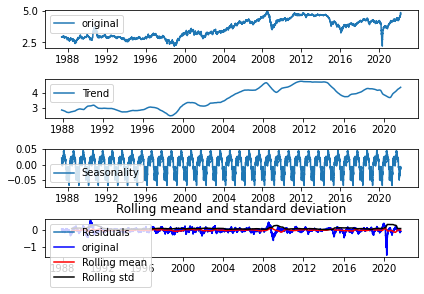

Results are:
test Statistic            -1.142457e+01
p-value                    6.744372e-21
#lags used                 2.900000e+01
No of Observations used    8.554000e+03
Critical value (1%)       -3.431115e+00
Critical value (5%)       -2.861878e+00
Critical value (10%)      -2.566950e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,freq=255)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label="original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


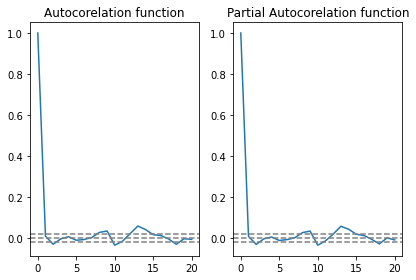

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title('Autocorelation function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title('Partial Autocorelation function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


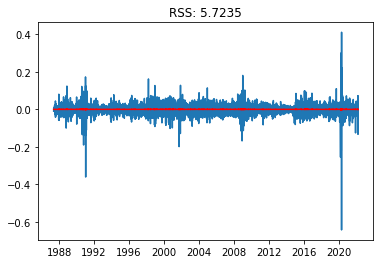

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale,order = (1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-datasetLogDiffShifting['value'])**2))
print("Plotting AR model")
#greater RSS the bad it is

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


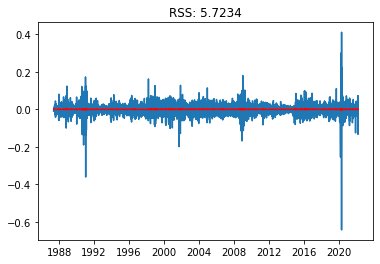

In [ ]:

#MA MODEL
model = ARIMA(indexedDataset_logScale,order = (0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_MA.fittedvalues-datasetLogDiffShifting['value'])**2))
print("Plotting MA model")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 5.7085')

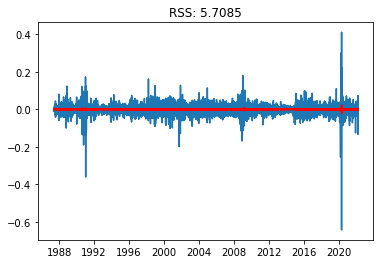

In [ ]:
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['value'])**2))


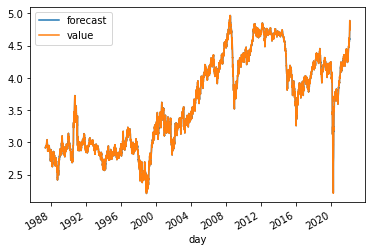

In [ ]:
results_ARIMA.plot_predict(dynamic=False)
plt.show()

In [ ]:
indexedDataset_logScale

,value
day,
1987-05-20,2.924773
1987-05-21,2.915064
1987-05-22,2.920470
1987-05-25,2.923162
1987-05-26,2.924773
...,...
2022-03-04,4.819152
2022-03-07,4.859967
2022-03-08,4.891702


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(array([4.74658326, 4.74931873, 4.74517506, 4.74232143, 4.74580024,
       4.74933189, 4.74726836, 4.74410244, 4.74568111, 4.74913068,
       4.74873357, 4.7459547 , 4.74613136, 4.74897383, 4.74970317,
       4.74767419, 4.74699525, 4.74901254, 4.75034352, 4.74915847,
       4.7481062 , 4.74930606, 4.75081327, 4.75038501, 4.74931954,
       4.74984703, 4.75123908, 4.75138424, 4.75052888, 4.75058845,
       4.75170624, 4.75221383, 4.75166962, 4.75146708, 4.75226001,
       4.75293831, 4.75271386, 4.75242055, 4.75291332, 4.75361534,
       4.75366104, 4.7533977 , 4.753657  , 4.75428844, 4.75452749,
       4.7543631 , 4.75446992, 4.75498502, 4.75533708, 4.755297  ,
       4.75532724, 4.75571786, 4.75611422, 4.75619267, 4.75620607,
       4.75648858, 4.75687946, 4.75705256, 4.75708868, 4.75729169,
       4.75764746, 4.75788432, 4.75796352, 4.75811825, 4.75842676,
       4.75869744, 4.75882486, 4.75895874, 4.75922065, 4.75950099,
       4.75967149, 4.75980494, 4.76002864]), array([0.0254160

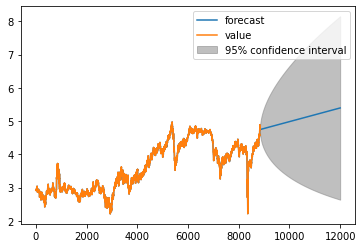

In [ ]:
#prediction for next 10 years
results_ARIMA.plot_predict(1,12000)
x = results_ARIMA.forecast(steps=73)
print(x)

In [ ]:
y_pred = np.exp(x[0])
print(y_pred)

[115.19003652 115.50556718 115.02794089 114.70016143 115.09987644
 115.50708728 115.26898024 114.90462541 115.08616494 115.48384888
 115.43799816 115.11765575 115.13799393 115.46573655 115.54998091
 115.31576992 115.23750418 115.47020611 115.62399743 115.48705748
 115.36559839 115.50410381 115.67832438 115.6287943  115.5056605
 115.56660467 115.72759146 115.74439122 115.645431   115.65232041
 115.78166732 115.84045172 115.7774272  115.75398081 115.84580182
 115.92440682 115.89838982 115.86440039 115.92150904 116.00291741
 116.00821932 115.97767354 116.0077497  116.08102566 116.10877819
 116.08969232 116.10209386 116.16191312 116.20281621 116.19815839
 116.20167279 116.24707216 116.29315661 116.30228076 116.30383909
 116.33670133 116.38218302 116.40233142 116.4065349  116.43016999
 116.47159978 116.49918952 116.50841751 116.52644586 116.56240129
 116.5939568  116.60881418 116.62442663 116.65497504 116.68768285
 116.7075796  116.72315585 116.749269  ]


In [ ]:
test = pd.read_csv("/content/test_data.csv")
y_test = test.iloc[:,1:]
print(y_test)

     value
0   118.11
1   110.39
2   105.14
3   104.61
4   113.50
..     ...
68  118.51
69  115.54
70  114.50
71  117.36
72  119.69

[73 rows x 1 columns]


In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
print(MAE)

7.166684520018787
